# EXERCISE SENTIMENT ANALYSIS

Nama : Nadila Fitri Noviardhana

NIM : 164221006

Kelas : SD- A2

Bahasa : Spanish, Sentiment Analysis

# Import Data dan Library

Import Library dan Load data terlebih dahulu.

In [1]:
import pandas as pd
from nltk import sent_tokenize 
from nltk import word_tokenize 
from nltk.corpus import stopwords
import regex as re

In [2]:
data = pd.read_excel("ExerciseSAClass.xlsx")

data

,Post ID,Post description,Date,Language,Translated Post Description,Sentiment,Hate
0,CgXDOaQDvGm,“I have decided that the global #monkeypox out...,07/23/2022,English,“I have decided that the global #monkeypox out...,neutral,Not Hate
1,CgXpRmMIdzG,In light of the evolving monkeypox outbreak wi...,07/23/2022,English,In light of the evolving monkeypox outbreak wi...,neutral,Not Hate
2,CgXaFGDsevq,If you've been hearing about monkeypox and wan...,07/23/2022,English,If you've been hearing about monkeypox and wan...,neutral,Not Hate
3,CgXGNrmLwoL,Monkeypox is a rare disease caused by infectio...,07/23/2022,English,Monkeypox is a rare disease caused by infectio...,neutral,Not Hate
4,CgXTqcjOQD-,For today's @newyorkermag dispatch. \n'The Ago...,07/23/2022,English,For today's @newyorkermag dispatch. \n'The Ago...,negative,Not Hate
...,...,...,...,...,...,...,...
35714,C_i5WL1xLCW,Cuidarte a ti es nuestra mayor santifacion 🙌🙌\...,09/05/2024,Spanish,Taking care of you is our greatest sanctificat...,neutral,Not Hate
35715,C_i5hlTvl6P,"De janeiro a agosto, o Brasil confirmou 945 ca...",09/05/2024,Portuguese,"From January to August, Brazil confirmed 945 c...",neutral,Not Hate
35716,C_i-2JhxPiE,#doença #mpox #cuidadoscomsaúde,09/05/2024,Portuguese,#disease #mpox #healthcare,neutral,Not Hate
35717,C_jL2hVN1qa,📌 Te contamos lo que debes saber sobre la Viru...,09/05/2024,Spanish,📌 We tell you what you need to know about Monk...,neutral,Not Hate


In [3]:
filtered_data = data[data['Language'] == 'Spanish']

filtered_data

,Post ID,Post description,Date,Language,Translated Post Description,Sentiment,Hate
66,CgeynVCFSmx,El conocimiento es poder!\nSon 4 las maneras d...,07/26/2022,Spanish,Knowledge is power! There are 4 ways to get mo...,neutral,Not Hate
95,CgiOoF-LZ5P,La #OMS recomienda a los hombres gays reducir ...,07/27/2022,Spanish,#WHO recommends gay men reduce the number of s...,neutral,Hate
123,CgiI_SKOXsY,Resumen de nuestro Miércoles Académico con la ...,07/27/2022,Spanish,Summary of our Academic Wednesday with the Upd...,neutral,Not Hate
139,Cgh6-Mzp-7K,"Embarcado pra Montreal, onde irá acontecer de ...",07/27/2022,Spanish,"Embarked to Montreal, where the 24th Internati...",positif,Not Hate
144,Cgh6-nJuXOI,"Embarcado pra Montreal, onde irá acontecer de ...",07/27/2022,Spanish,"Embarked to Montreal, where the 24th Internati...",positif,Not Hate
...,...,...,...,...,...,...,...
35707,C_jRNiyRobg,#mpox #varioladosmacacos #brasil #infectologia...,09/05/2024,Spanish,#mpox #monkeyvariola #brazil #infectology #🦠 #...,neutral,Not Hate
35710,C_i7vfBoctG,🇨🇩República Democrática del Congo está en el e...,09/05/2024,Spanish,🇨🇩The Democratic Republic of the Congo is at t...,neutral,Not Hate
35711,C_i8UHTy_9K,📢 SÍNTOMAS DE LA VIRUELA DEL MONO (MPOX)\n\nCo...,09/05/2024,Spanish,📢 SYMPTOMS OF MONKEYPOX (MPOX) Share this valu...,neutral,Not Hate
35714,C_i5WL1xLCW,Cuidarte a ti es nuestra mayor santifacion 🙌🙌\...,09/05/2024,Spanish,Taking care of you is our greatest sanctificat...,neutral,Not Hate


Kemudian melakukan filterisasi data sesuai dengan yang dibutuhkan, yaitu Bahasa Spanish

In [4]:
selected_columns = filtered_data[['Post ID', 'Post description', 'Language', 'Sentiment']]

selected_columns

,Post ID,Post description,Language,Sentiment
66,CgeynVCFSmx,El conocimiento es poder!\nSon 4 las maneras d...,Spanish,neutral
95,CgiOoF-LZ5P,La #OMS recomienda a los hombres gays reducir ...,Spanish,neutral
123,CgiI_SKOXsY,Resumen de nuestro Miércoles Académico con la ...,Spanish,neutral
139,Cgh6-Mzp-7K,"Embarcado pra Montreal, onde irá acontecer de ...",Spanish,positif
144,Cgh6-nJuXOI,"Embarcado pra Montreal, onde irá acontecer de ...",Spanish,positif
...,...,...,...,...
35707,C_jRNiyRobg,#mpox #varioladosmacacos #brasil #infectologia...,Spanish,neutral
35710,C_i7vfBoctG,🇨🇩República Democrática del Congo está en el e...,Spanish,neutral
35711,C_i8UHTy_9K,📢 SÍNTOMAS DE LA VIRUELA DEL MONO (MPOX)\n\nCo...,Spanish,neutral
35714,C_i5WL1xLCW,Cuidarte a ti es nuestra mayor santifacion 🙌🙌\...,Spanish,neutral


Proses di atas digunakan untuk membaca dataset yang akan digunakan. Kemudian dilakukan filterisasi data untuk memilih data yang menggunakan Bahasa Spanish sesuai dengan pembagian tugas. Kemudian dilakukan seleksi untuk memilih fitur mana yang penting dan akan digunakan untuk proses analisis.


# PreProcessing

Sebelum data dimasukkan ke dalam model untuk sentiment analysis, diperlukan proses pembersihan data dan preprocessing untuk mempersiapkan datanya.

In [5]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import regex as re

stop_words = set(stopwords.words('spanish'))  

def preprocess(doc): 
    sents = word_tokenize(doc) 
    sents_tok = []  
    
    for s in sents: 
        s = s.strip().lower()  # Case folding dan menghilangkan new line 
        s = s.replace("\n", " ")  # Mengganti \n dengan spasi 
        s = re.sub(r'[0-9]+', '', s)  # Menghapus angka 
        s = re.sub(r'[^a-zA-Z ]', ' ', s)  # Menghapus simbol, kecuali spasi 
        s = re.sub(' +', ' ', s)  # Menghapus repetitive space 
        sents_tok.append(s) 
    
    sents_tok = [word for word in ' '.join(sents_tok).split() if word not in stop_words]
    return " ".join(sents_tok)

docs_clear = []
for d in selected_columns["Post description"]: 
    docs_clear.append(preprocess(d))

docs_clear


['conocimiento poder maneras contagiarse monkeypox aprende comparte menosmiedo masinformacioncient fica',
 'oms recomienda hombres gays reducir n mero parejas sexuales avance virueladelmono entra bio m s informaci n monkeypox salud noticias',
 'resumen rcoles acad mico actualizaci n viruela s mica monkeypox bajo coordinaci n dra antonia tineo atineo gracias colaboradores megalabsvenezuela laboratoriocofasa ve seguimos formaci n',
 'embarcado pra montreal onde ir acontecer jul ago th internacional aids conference aids conference principal evento mundial hiv aids esse ano abordando as tem ticas adicionais monkeypox covid infectologia medicina aids hiv monkeypox covid',
 'embarcado pra montreal onde ir acontecer jul ago th internacional aids conference aids conference principal evento mundial hiv aids esse ano abordando as tem ticas adicionais monkeypox covid infectologia medicina aids hiv monkeypox covid',
 'viruela mono enfermedad preocupa millones personas mundo embargo existe antigua 

Kode di atas akan memroses tiap dokumen dalam dataset. Proses pertama adalah melakukan tokenisasi. Kemudian dilakukan pembersihan dokumen menggunakan proses Regular Expression dan Casefolding. Kemudian yang terakhir adalah penghapusan stopwords. Data yang telah diproses disimpan dalam variable yang bernama dosc_clear. Berikut merupakan hasil teks yang telah di preprocessing.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cluster

tfidf_vectorizer = TfidfVectorizer(max_df=0.50, min_df = 2)
X = tfidf_vectorizer.fit_transform(docs_clear)
print(X)

  (0, 2402)	0.36396646372217556
  (0, 1081)	0.28978735689304846
  (0, 387)	0.38967176970393824
  (0, 1261)	0.4238425767533503
  (0, 3570)	0.44517393578710723
  (0, 4548)	0.33595555510641556
  (0, 1196)	0.37552511898187724
  (1, 4066)	0.23428929828321368
  (1, 5301)	0.11780024672631685
  (1, 3031)	0.1513983345167907
  (1, 646)	0.2224832482484607
  (1, 2065)	0.30774947287929055
  (1, 539)	0.36583896741859456
  (1, 5503)	0.2409082091044161
  (1, 4336)	0.2902663730151468
  (1, 3724)	0.2902663730151468
  (1, 5044)	0.2886181869350393
  (1, 2553)	0.3494818140190239
  (1, 2810)	0.23684516400164465
  (1, 5005)	0.3204370667493719
  (1, 4197)	0.19875624658840554
  (2, 2453)	0.3087165254421092
  (2, 5419)	0.3178738423636542
  (2, 6208)	0.31308677528466916
  (2, 2651)	0.23045685978350075
  :	:
  (2058, 1825)	0.15682531712172984
  (2058, 5880)	0.1776033149921982
  (2058, 885)	0.17183818896675987
  (2058, 4670)	0.1346031730232408
  (2058, 4101)	0.11586078498857116
  (2058, 6308)	0.1107060120191716
  

Untuk mengubah teks yang ada menjadi numerik, maka dilakukan ekstraksi fitur. Proses ekstraksi fitur yang digunakan kali ini adalah TF-IDF dan menghasilkan data numerik sebagai berikut.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = X  
y = selected_columns['Sentiment']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Hasil dari tf idf dipecah menjadi data training dan testing serta ditambahkan kolom y sentimen di dalamnya. Perbandingan yang digunakan adalah 80 persen data traning dan 20 persen data testing.

# Checking Unbalanced

In [8]:
from collections import Counter
from imblearn.over_sampling import SMOTE

print("Distribusi label sebelum SMOTE:")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Distribusi label sebelum SMOTE:
neutral     1358
positif      174
negative     116
Name: Sentiment, dtype: int64


Kemdudian dilakukan pengecekan bahwa pada y, distribusi dari ketiga kategori tidak merata dan rentan mengalami overfitting. Maka dilakukan SMOTE untuk meratakan distribusinya.

In [9]:
print("\nDistribusi label setelah SMOTE:")
print(Counter(y_train_smote))


Distribusi label setelah SMOTE:
Counter({'neutral': 1358, 'positif': 1358, 'negative': 1358})


Distribusi setelah dilakukan SMOTE menjadi merata.

# Pemodelan Klasifikasi

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


model_smote_svm = SVC(kernel='linear', max_iter=1000)

model_smote_svm.fit(X_train_smote, y_train_smote)

y_pred_smote_svm = model_smote_svm.predict(X_test)

print("Akurasi setelah SMOTE dengan SVM:", accuracy_score(y_test, y_pred_smote_svm))
print(classification_report(y_test, y_pred_smote_svm))


Akurasi setelah SMOTE dengan SVM: 0.8910411622276029
              precision    recall  f1-score   support

    negative       0.45      0.43      0.44        23
     neutral       0.93      0.95      0.94       349
     positif       0.77      0.66      0.71        41

    accuracy                           0.89       413
   macro avg       0.72      0.68      0.70       413
weighted avg       0.89      0.89      0.89       413



c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Kemudian dilakukan pemodelan klasifikasi dengan algoritma SVM menggunakan y_train dan x_train yang telah di smote. 
Akurasi model setelah penerapan SMOTE adalah 89.104%, namun terdapat variasi kinerja antar kelas. Precision dan recall untuk kelas "neutral" sangat tinggi (93%), menunjukkan model ini mampu mengklasifikasikan sebagian besar data netral dengan benar. Namun, kelas "negative" dan "positif" memiliki precision dan recall yang lebih rendah, terutama kelas "negative" yang hanya memiliki precision 45% dan recall 43%, menandakan model kesulitan mengklasifikasikan data dari kelas ini. Secara keseluruhan, kinerja model lebih baik pada kelas mayoritas (neutral), sementara performa pada kelas minoritas masih perlu ditingkatkan.

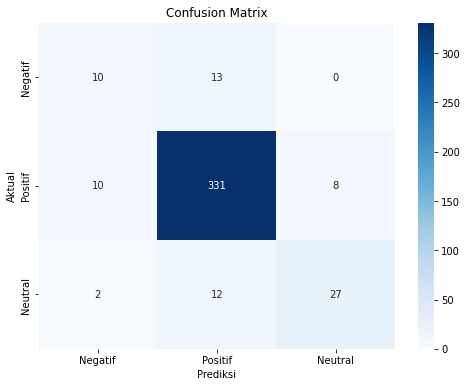

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_smote_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif', 'Neutral'], yticklabels=['Negatif', 'Positif', 'Neutral'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

confusion matrix pada gambar ini memberikan ringkasan hasil klasifikasi untuk masing-masing kelas: "Negatif," "Positif," dan "Netral." Berikut adalah interpretasinya:
1. Negatif: Dari 23 sampel "Negatif" yang sebenarnya, model berhasil mengklasifikasikan 10 dengan benar sebagai "Negatif," tetapi salah mengklasifikasikan 13 sebagai "Positif," dan tidak ada yang salah menjadi "Netral."
2. Positif: Dari 349 sampel "Positif" yang sebenarnya, model berhasil mengklasifikasikan 331 dengan benar, tetapi salah mengklasifikasikan 10 sebagai "Negatif" dan 8 sebagai "Netral."
3. Netral: Dari 41 sampel "Netral" yang sebenarnya, 27 diklasifikasikan dengan benar sebagai "Netral," tetapi 12 salah diklasifikasikan sebagai "Positif," dan 2 sebagai "Negatif."

Ini menunjukkan bahwa model sangat baik dalam mengenali sampel "Positif," tetapi kesulitan membedakan antara sampel "Negatif" dan "Netral," yang sering diklasifikasikan sebagai "Positif."

# Evaluasi Kesalahan

In [12]:
count = 0
for i in range (0, len(y_test)) :
    if y_test.iloc[i]!=y_pred_smote_svm[i]:
        print ("indeks", y_test.index[i], "salah", y_test.iloc[i], "Hasil prediksi", y_pred_smote_svm[i])
        count+=1
print(count)

indeks 19693 salah positif Hasil prediksi neutral
indeks 16142 salah negative Hasil prediksi neutral
indeks 32428 salah negative Hasil prediksi neutral
indeks 1378 salah negative Hasil prediksi neutral
indeks 24380 salah neutral Hasil prediksi positif
indeks 12519 salah negative Hasil prediksi neutral
indeks 19815 salah positif Hasil prediksi negative
indeks 35474 salah positif Hasil prediksi neutral
indeks 23121 salah negative Hasil prediksi neutral
indeks 6665 salah neutral Hasil prediksi negative
indeks 5129 salah neutral Hasil prediksi negative
indeks 12052 salah neutral Hasil prediksi negative
indeks 35346 salah neutral Hasil prediksi positif
indeks 6760 salah positif Hasil prediksi neutral
indeks 27024 salah neutral Hasil prediksi positif
indeks 19912 salah positif Hasil prediksi negative
indeks 24090 salah positif Hasil prediksi neutral
indeks 35334 salah positif Hasil prediksi neutral
indeks 17933 salah neutral Hasil prediksi positif
indeks 7121 salah negative Hasil prediksi ne

Dari daftar ini, bisa dilihat bahwa banyak kesalahan prediksi terjadi antara label "negatif" dan "neutral," atau antara "neutral" dan "positif." Jumlah total kesalahan yang tercatat adalah 45 kesalahan prediksi.  Hal ini sesuai dengan confusion matrix dan akurasi yang telah dijelaskan di awal. 